In [1]:
import os
import sys
import glob
import numpy as np
from astropy import units as u 
from astropy import coordinates
from astropy.io import fits
import matplotlib.pyplot as plt
import aplpy

%matplotlib inline

### Test, make a random in circle or annulus shape

In [2]:
N = 10000
Rout = 10
Rin = 4

u = np.random.random(N)
v = np.random.random(N)

Circle

In [3]:
theta = 2*np.pi*u
r = Rout*np.sqrt(v)

x = r*np.cos(theta)
y = r*np.sin(theta)

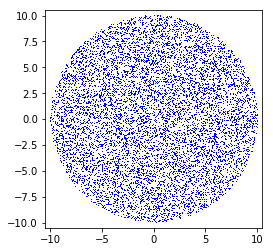

In [4]:
plt.plot(x, y, 'b,')
corr = 0.5; lim = [-Rout-corr, Rout+corr]
plt.xlim(lim); plt.ylim(lim); plt.gca().set_aspect('equal', adjustable='box')

Annulus

In [5]:
theta = 2*np.pi*u
annul = Rout**2 - Rin**2
r = np.sqrt(annul*v + Rin**2)

x = r*np.cos(theta)
y = r*np.sin(theta)

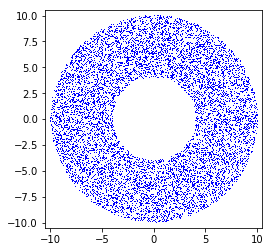

In [6]:
plt.plot(x, y, 'b,')
corr = 0.5; lim = [-Rout-corr, Rout+corr]
plt.xlim(lim); plt.ylim(lim); plt.gca().set_aspect('equal', adjustable='box')

Test with a grouping in a random maker

In [93]:
def randomy(Rin, Rout):
    u = np.random.random()
    v = np.random.random()

    theta = 2*np.pi*u
    annul = Rout**2 - Rin**2
    r = np.sqrt(annul*v + Rin**2)

    x = r*np.cos(theta)
    y = r*np.sin(theta)

    return x, y

In [94]:
def random_annulus(N, Rin, Rout, distol=0.5):
    sample = []
    x, y = randomy(Rin, Rout)
    sample.append([x, y])
    
    niter = 0
    itermax = 100000
    while len(sample) < N:
        x, y = randomy(Rin, Rout)
        accept = True
        for prevsample in sample:
            distance = np.sqrt( (prevsample[0] - x)**2 + (prevsample[1] - y)**2)
            if distance < distol:
                accept = False
                break
        
        if accept:
            sample.append([x, y])
        
        niter += 1
        if niter > itermax:
            print "Reach itermax"
            print "Number of sample : ", len(sample)
            break
            
    return sample

In [95]:
# group of 100, times 100 generation

In [136]:
sample = random_annulus(N=100, Rin=0.4, Rout=36, distol=2.0)

In [137]:
#sample

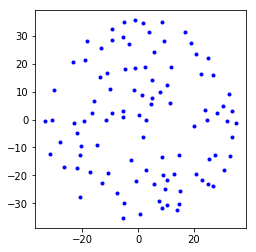

In [138]:
s = np.array(sample)
plt.plot(s.T[0], s.T[1], 'b.')
plt.gca().set_aspect('equal', adjustable='box')

In [123]:
sample = []
for i in range(100):
    samp = random_annulus(100, Rin=0.4, Rout=36, distol=2.0)
    sample.extend(samp)

In [124]:
s = np.array(sample)

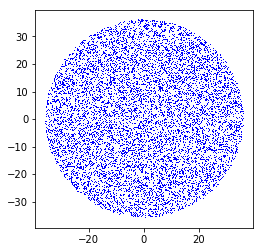

In [125]:
plt.plot(s.T[0], s.T[1], 'b,')
plt.gca().set_aspect('equal', adjustable='box')

I don't know if this method generate same 'randomness', need to check with 2-point correlation function?

### Test the function

In [101]:
def generate_sample_random(Nsample=100, flux=1.02e-04, freq='241.23GHz', center=[65.8158364, -1.3425182], 
                           PB=24.0, outer_radius=36.0, inner_radius=0.4):
    """
    generate random in 'annulus'-shape with 
    outer radius = 1.5 PB
    inner radius = beamsize
    unit -> arcsec
    """
    sample = []

    PB_in_deg = PB/3600.0

    # make a random in polar coordinate
    u = np.random.random(Nsample)
    v = np.random.random(Nsample)

    theta = 2*np.pi*u 
    annul = outer_radius**2 - inner_radius**2
    r = np.sqrt(annul*v + inner_radius**2)

    ra = center[0] + r*np.cos(theta)/3600.0 # in degree
    dec = center[1] + r*np.sin(theta)/3600.0 



    # flux scalling from PB
    theta_from_the_center = r/3600.0 # in degree
    scaled_flux = flux * np.exp(-np.log(2) * (2*theta_from_the_center/PB_in_deg)**2)

    for i in range(Nsample):
        pos = 'J2000 ' + str(ra[i]) + 'deg ' + str(dec[i]) + 'deg'
        sample.append([pos, scaled_flux[i], 'Jy', freq, 'point'])

    return sample, ra, dec

In [102]:
sample, ra, dec = generate_sample_random(Nsample=10000)

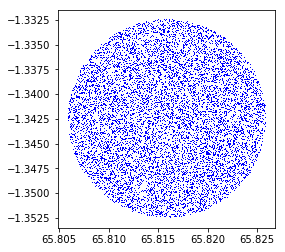

In [103]:
plt.plot(ra, dec, 'b,')
plt.gca().set_aspect('equal', adjustable='box')

In [104]:
sample, ra, dec = generate_sample_random(Nsample=100)

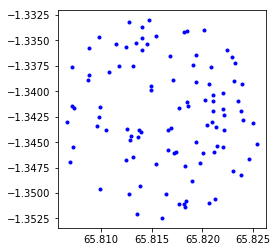

In [105]:
plt.plot(ra, dec, 'b.')
plt.gca().set_aspect('equal', adjustable='box')

100 is simply still not enough for 'random' sampling

In [106]:
24*24

576